In [26]:
import numpy as np
import os
import sys
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [27]:
myData = 'snow_data/snow_cryo_5-10km_2017101506.dat'

In [28]:
def get_data_fromtxt(txtFile):
    
    lat     = []
    lon     = []
    snowFrac = []
    
    f = open(txtFile, 'r')
    
    for line in f:
        
        line    = line.strip()
        columns = line.split()
        
        lat.append(float(columns[2]))
        lon.append(float(columns[3]))
        snowFrac.append(float(columns[4]))

    f.close()

    return lat, lon, snowFrac

In [29]:
lat, lon, snowFrac = get_data_fromtxt(myData)
print(len(lat))

3326


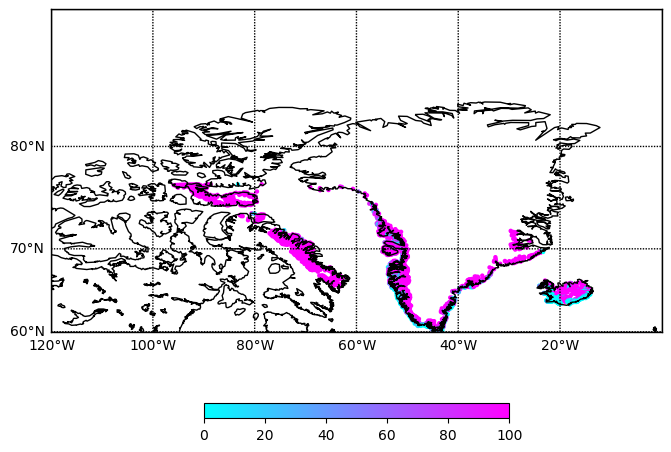

In [30]:
mycmap = plt.cm.get_cmap('cool')

lowerLeftLat  = 60
lowerLeftLon  = -120
upperRightLat = 90
upperRightLon = 0
lat_inter = 10
lon_inter = 20

plt.figure(figsize=(7.88,6.29), dpi=100)

# For cylindrical projections 'mill' 'merc' 'cyl' 'cea' Basemap below is OK
# resolution: c (crude), l (low), i (intermediate), h (high), f (full)
m=Basemap(projection='mill',llcrnrlon = lowerLeftLon, llcrnrlat = lowerLeftLat,
          urcrnrlon = upperRightLon, urcrnrlat = upperRightLat,
          resolution='l')

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(lowerLeftLat,upperRightLat,lat_inter),labels=[1,0,0,0])
m.drawmeridians(np.arange(lowerLeftLon,upperRightLon,lon_inter),labels=[0,0,0,1])
#m.fillcontinents()

x,y = m(lon, lat)
sc = plt.scatter(x,y, c=snowFrac, vmin=0, vmax=100, cmap=mycmap, s=10, edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5,orientation="horizontal")